# Testing Slope Fitting on Synthetic PSDs

Words, words, words.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Custom code imports
from slf.fit import *
from slf.fake import *
from slf.plts.psd import *
from slf import syn

/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Check out PSD generation and test fitting

In [3]:
# OLD VERSION
# # Generate a single synthetic PSD
# slv_test = 1.0

# fs, psd = syn.mfonef(
#     mf=[10],
#     mf_sig=[2],
#     mk=[0.2],
#     chi=slv_test,
#     f0=3,
#     fmax=40,
#     res=0.5,
#     noi=0.1
# )

In [4]:
# Generate a single synthetic test PSD
sl_val = 1
noise = 0.1
oscs = syn.gen_osc_def
fs, psd = syn.sim_psd([3, 40], sl_val, syn.gen_osc_def, noise)

<function gen_osc_def at 0x116383048>


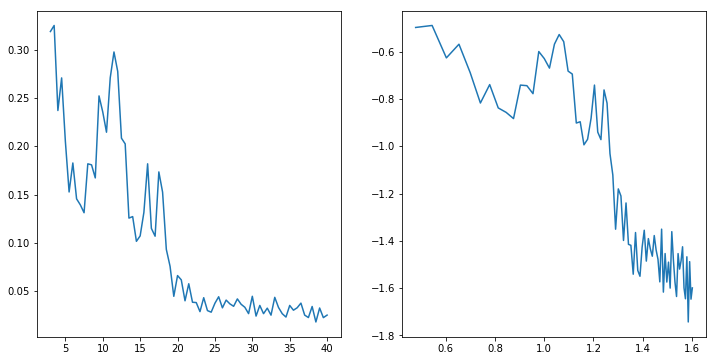

In [5]:
# Two subplots, the axes array is 1-d
print(oscs)
plt_psd_both(fs, psd)

In [6]:
# Test out fits
print('True slope value is ', str(sl_val), '\n')
print('OLS fit: \t', fsl_ols(fs, psd))
print('RLM fit: \t', fsl_rlm(fs, psd))
print('RLM-EA fit: \t', fsl_rlm_alph(fs, psd))
print('RLM-EO fit: \t', fsl_rlm_oscs(fs, psd))
print('RAN fit: \t', fsl_ransac(fs, psd))
print('RAN-EA fit: \t', fsl_ransac_alph(fs, psd))
print('RAN-EO fit: \t', fsl_ransac_oscs(fs, psd))
print('EXP fit: \t', fsl_exp(fs, psd))
print('EXP-EA fit: \t', fsl_exp_alph(fs, psd))
print('EXP-EO fit: \t', fsl_exp_oscs(fs, psd))
print('FOOOF fit: \t', fsl_fooof(fs, psd))

True slope value is  1 

OLS fit: 	 -1.17634694992
RLM fit: 	 -1.15837775783
RLM-EA fit: 	 -1.04715263142
RLM-EO fit: 	 -1.02403579256
RAN fit: 	 -1.18459769632
RAN-EA fit: 	 -1.03437173903
RAN-EO fit: 	 -1.04147135077
EXP fit: 	 -1.17634695408
EXP-EA fit: 	 -1.06514209405
EXP-EO fit: 	 -1.02678589117
FOOOF fit: 	 -1.04099265712


## Run a bunch of synthetic fits

In [7]:
# Settings
n_psds = 10
f_range = [3, 40]
sl_val = 1
noi_val = 0.0

# Simulate a group of PSDs
freqs, psds = syn.sim_n_psds(n_psds, f_range, sl_val, syn.gen_osc_def, noi_val)

In [8]:
# Initialize and set up for synthetic data testing
syns = SynFits()
syns.get_fit_funcs()

In [9]:
# Check the fitting functions being used
print(list(syns.fit_funcs.keys()))

['OLS', 'RLM', 'RLM-EA', 'RLM-EO', 'RAN', 'RAN-EA', 'RAN-EO', 'EXP', 'EXP-EA', 'EXP-EO', 'FOOOF']


In [10]:
# Fit slopes
syns.fit_slopes(sl_val, freqs, psds)

/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [11]:
# Calculate metrics
avgs = syns.calc_avg_errs()
perc_good = syns.calc_perc_good()

In [12]:
# Check errors per fitting method
print('AVERAGE SLOPE FITTING ERRORS')
print_res(avgs)

AVERAGE SLOPE FITTING ERRORS
   RLM-EO   		 0.00000
   RLM      		 0.00004
   FOOOF    		 0.00026
   RAN-EO   		 0.00112
   EXP-EO   		 0.00112
   RLM-EA   		 0.00190
   RAN      		 0.00516
   RAN-EA   		 0.00950
   EXP      		 0.02186
   OLS      		 0.02186
   EXP-EA   		 0.03448


In [13]:
# Check errors per fitting method
print('PERCENTAGE FITS BELOW ERROR THRESHOLD')
print_res(perc_good)

PERCENTAGE FITS BELOW ERROR THRESHOLD
   RLM-EO   		 1.00000
   RAN-EO   		 0.90000
   FOOOF    		 0.90000
   EXP-EO   		 0.90000
   RLM-EA   		 0.70000
   RLM      		 0.60000
   RAN-EA   		 0.60000
   RAN      		 0.60000
   OLS      		 0.50000
   EXP-EA   		 0.50000
   EXP      		 0.50000


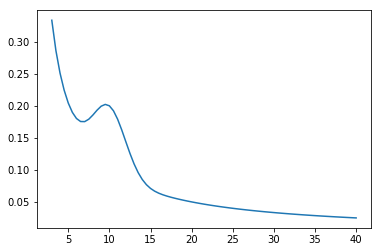

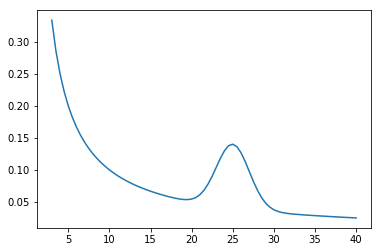

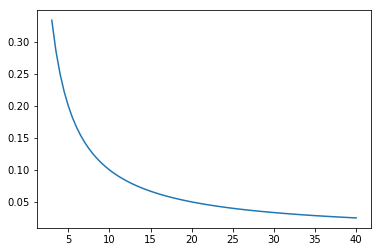

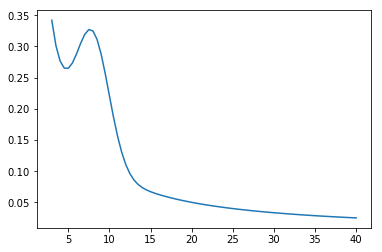

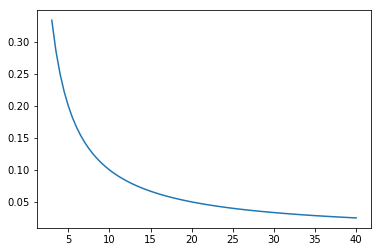

In [14]:
# Check out some of the synthetic plots
for ind, psd in enumerate(psds.T):
    if ind < 5:
        plt.figure()
        plt.plot(freqs, psd)

### OLD - FIT A BUNCH OF PSDs

In [15]:
# # Settings for syn data generation and slope fitting
# slv = 1
# n_psds = 10

# # Synthesize some data
# fs, psds = syn.synthesize(n_psds, fn=syn.mfonef, 
#                           mf=[10, 20], mf_sig=[1, 0.5], mk=[0.2, 0.2], chi=slv, 
#                           f0=3, fmax=40, res=0.5, noi=0.05)

In [16]:
# def mk_psds(n_psds, slv):
#     """Generate synthetic PSDs."""

#     fs, psds = syn.synthesize(n_psds, fn=syn.mfonef,
#                               mf=[10, 20], mf_sig=[1, 1.4], mk=[0.2, 0.2], chi=slv,
#                               f0=3, fmax=40, res=0.5, noi=0.05)

#     return fs, psds

In [17]:
# plt.plot(fs, psds[:, 0])

In [18]:
# # Initialize and set up for synthetic data testing
# syns = SynFits()
# syns.get_fit_funcs()

In [19]:
# # Check the fitting functions being used
# print(list(syns.fit_funcs.keys()))

In [20]:
# # Create some PSDs
# n_psds = 100
# slv = 1
# fs, psds = mk_psds(n_psds, slv)

In [21]:
# # Fit slopes
# syns.fit_slopes(slv, fs, psds)

In [22]:
# # Check errors per fitting method
# mes = syns.calc_avg_errs()
# print_errs(mes)

## Check Error Distributions

In [23]:
from slf.plts.fake import *

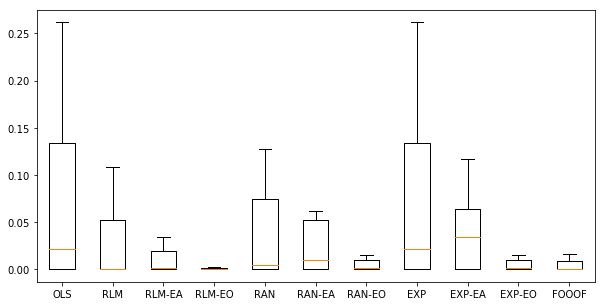

In [24]:
# Create boxplot of errors
boxplot_errors(syns.errs)

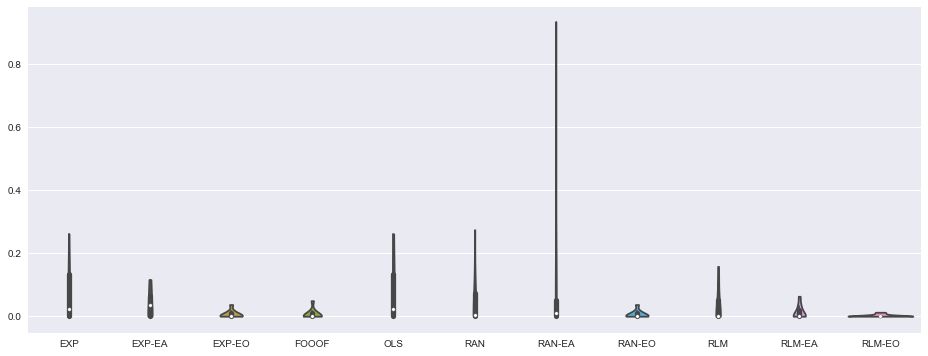

In [25]:
# Violin plot of error distributions
violin_errors(syns.errs)

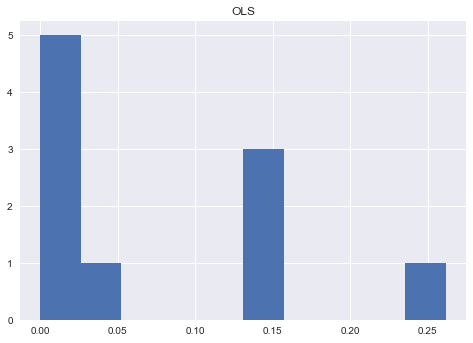

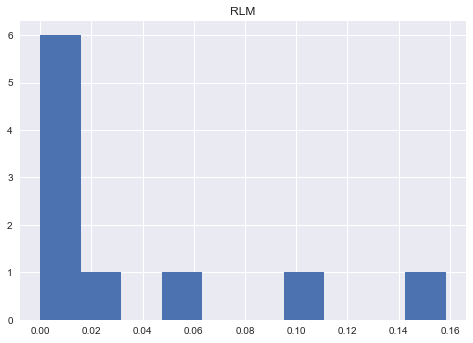

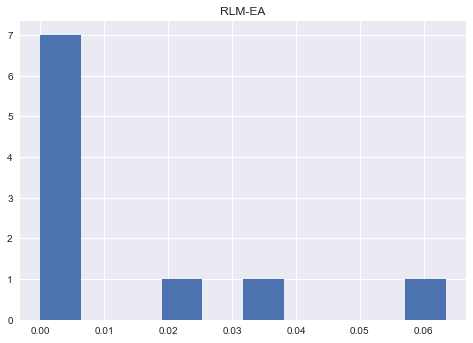

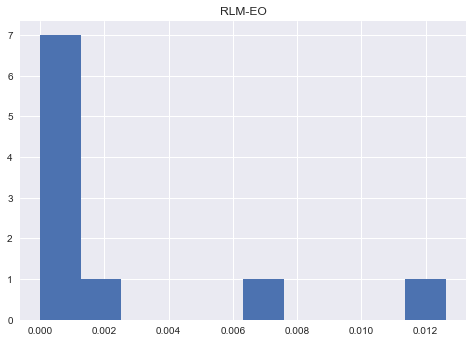

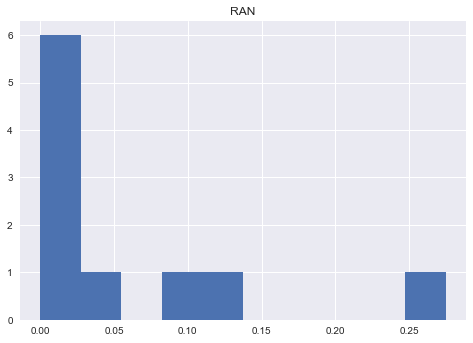

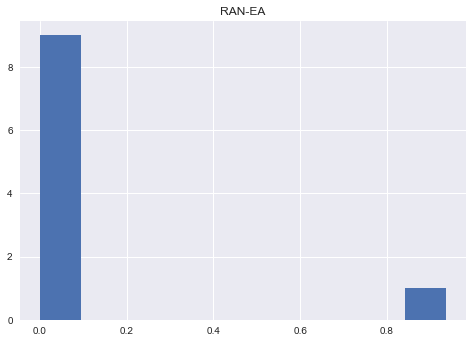

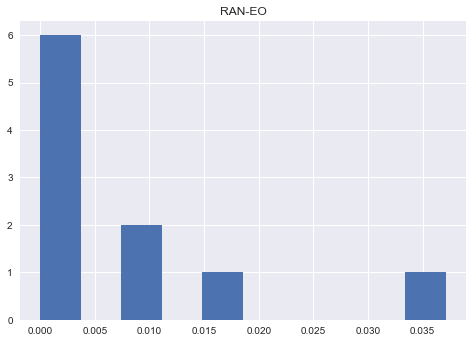

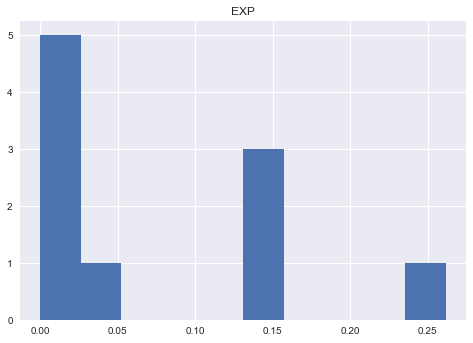

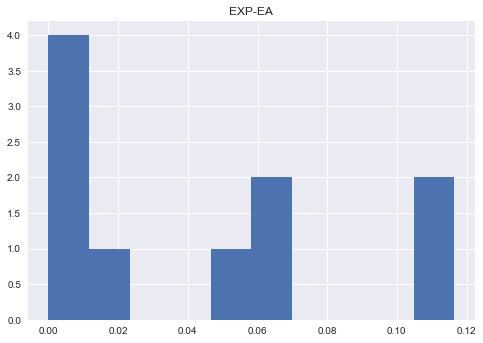

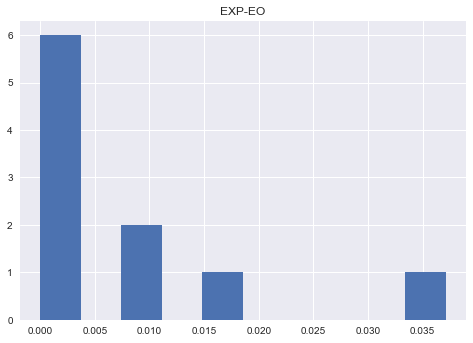

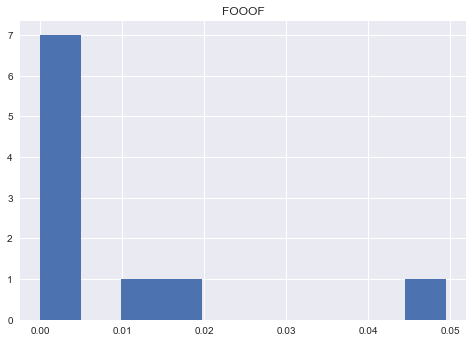

In [26]:
for meth in syns.errs.keys():
    plt.figure()
    plt.hist(syns.errs[meth])
    plt.title(meth)

## Statistically Compare Methods

In [27]:
# Run comparisons between methods
comps = syns.comp_errs()

In [28]:
# Print out color-coded dataframe of comparison results
from slf.plts.fake import _color_red_or_green
df = pd.DataFrame(comps, index=syns.errs.keys(), columns=syns.errs.keys())
df.style.applymap(_color_red_or_green)

,OLS,RLM,RLM-EA,RLM-EO,RAN,RAN-EA,RAN-EO,EXP,EXP-EA,EXP-EO,FOOOF
OLS,1,0.596701,0.705457,0.449692,0.879829,0.705457,0.256839,0.596701,0.939743,0.596701,0.596701
RLM,0.596701,1,0.820596,0.879829,0.364346,0.879829,0.705457,0.256839,0.325751,0.820596,0.820596
RLM-EA,0.705457,0.820596,1,0.198765,1,0.939743,0.449692,0.112411,0.112411,0.650147,0.762369
RLM-EO,0.449692,0.879829,0.198765,1,0.650147,0.596701,0.879829,0.0493662,0.0493662,0.173617,0.198765
RAN,0.879829,0.364346,1,0.650147,1,0.54535,0.173617,0.289918,0.496292,0.879829,0.879829
RAN-EA,0.705457,0.879829,0.939743,0.596701,0.54535,1,0.325751,0.325751,0.289918,0.705457,0.705457
RAN-EO,0.256839,0.705457,0.449692,0.879829,0.173617,0.325751,1,0.0820987,0.0587817,0.496292,0.596701
EXP,0.596701,0.256839,0.112411,0.0493662,0.289918,0.325751,0.0820987,1,0.256839,0.596701,0.596701
EXP-EA,0.939743,0.325751,0.112411,0.0493662,0.496292,0.289918,0.0587817,0.256839,1,0.496292,0.496292
EXP-EO,0.596701,0.820596,0.650147,0.173617,0.879829,0.705457,0.496292,0.596701,0.496292,1,0.596701


### Other Stuff

In [29]:
from scipy.stats.mstats import normaltest

In [31]:
nt_dict = {}
for meth in syns.errs.keys():
    stat, pval = normaltest(syns.errs[meth])
    nt_dict[meth] = pval
    
nt_df = pd.DataFrame.from_dict(nt_dict, 'index')
nt_df.style.applymap(_color_red_or_green)

/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:2237: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  np.min(n))


,0
OLS,0.278914
RLM,0.0483624
RLM-EA,0.010181
RLM-EO,0.00320004
RAN,0.00171315
RAN-EA,8.34054e-07
RAN-EO,0.000861401
EXP,0.278914
EXP-EA,0.443786
EXP-EO,0.000861402
